In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine = load_wine()

In [3]:
wine.data.shape

(178, 13)

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [13]:
pd.concat([pd.DataFrame(wine.data, columns = wine.feature_names), pd.DataFrame(wine.target)], axis = 1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,0


In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(wine.data, wine.target, test_size = 0.3)

In [15]:
xtrain.shape

(124, 13)

In [16]:
ytrain

array([2, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 1, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1,
       0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 2, 0, 0, 0])

In [18]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf = clf.fit(xtrain, ytrain)
score = clf.score(xtest, ytest)

In [19]:
score

0.9074074074074074

In [20]:
import graphviz

In [21]:
dot_data = tree.export_graphviz(clf
                               ,feature_names = wine.feature_names
                               ,class_names= wine.target_names
                               ,filled=True
                               ,rounded=True)

In [23]:
graph = graphviz.Source(dot_data)

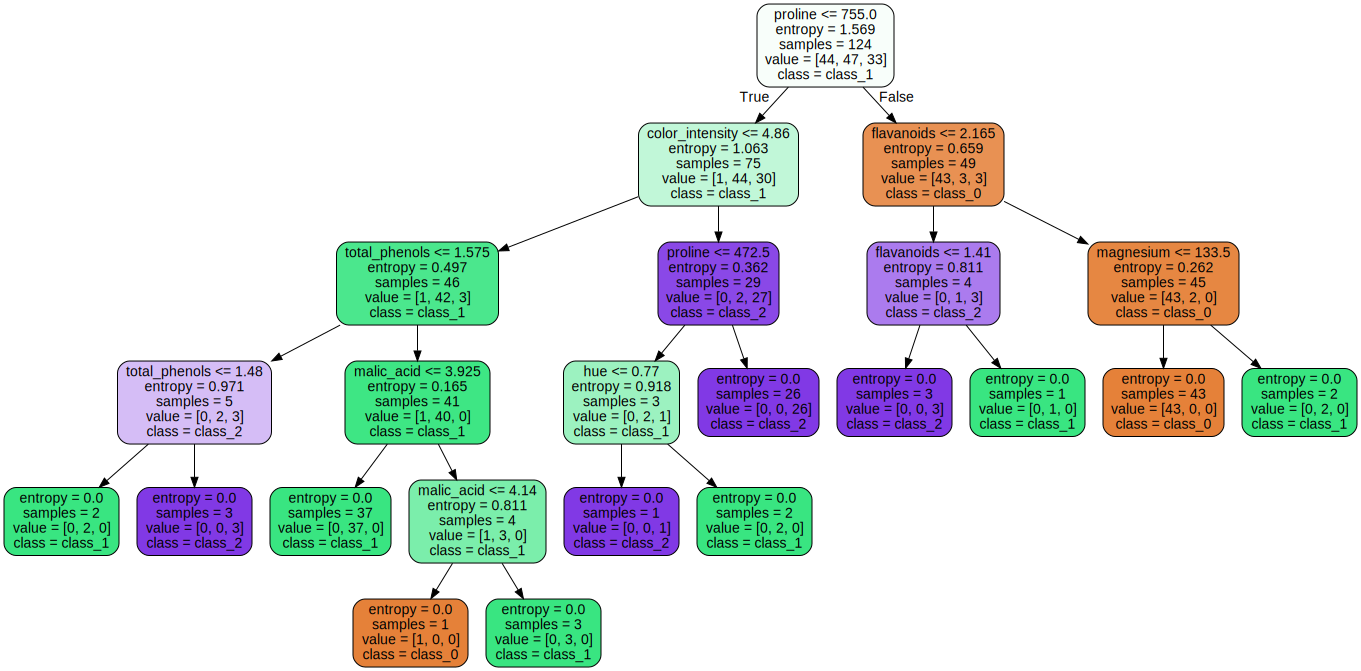

In [24]:
graph

In [25]:
clf.feature_importances_

array([0.        , 0.03485813, 0.        , 0.        , 0.06066568,
       0.08258589, 0.10524298, 0.        , 0.        , 0.23841015,
       0.01415851, 0.        , 0.46407866])

In [26]:
pd.concat([pd.DataFrame(wine.feature_names, columns = ['feature']), pd.DataFrame(clf.feature_importances_, columns = ['importance'])], axis = 1)

,feature,importance
0,alcohol,0.000000
1,malic_acid,0.034858
2,ash,0.000000
3,alcalinity_of_ash,0.000000
4,magnesium,0.060666
5,total_phenols,0.082586
6,flavanoids,0.105243
7,nonflavanoid_phenols,0.000000
8,proanthocyanins,0.000000
9,color_intensity,0.238410


In [27]:
[*zip(wine.feature_names, clf.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.03485812628251554),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.06066568132992719),
 ('total_phenols', 0.08258589046402308),
 ('flavanoids', 0.10524297996304612),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.2384101478660297),
 ('hue', 0.014158510519744613),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.4640786635747136)]

In [31]:
print(clf.score(xtrain, ytrain))
print(clf.score(xtest, ytest))

1.0
0.9074074074074074


In [38]:
#調整split
clf_split = DecisionTreeClassifier(criterion= 'entropy', random_state=1, splitter= 'random')
clf_split = clf_split.fit(xtrain, ytrain)
print(clf_split.score(xtrain,ytrain), clf_split.score(xtest, ytest))

1.0 0.8518518518518519


0.9516129032258065 0.9629629629629629


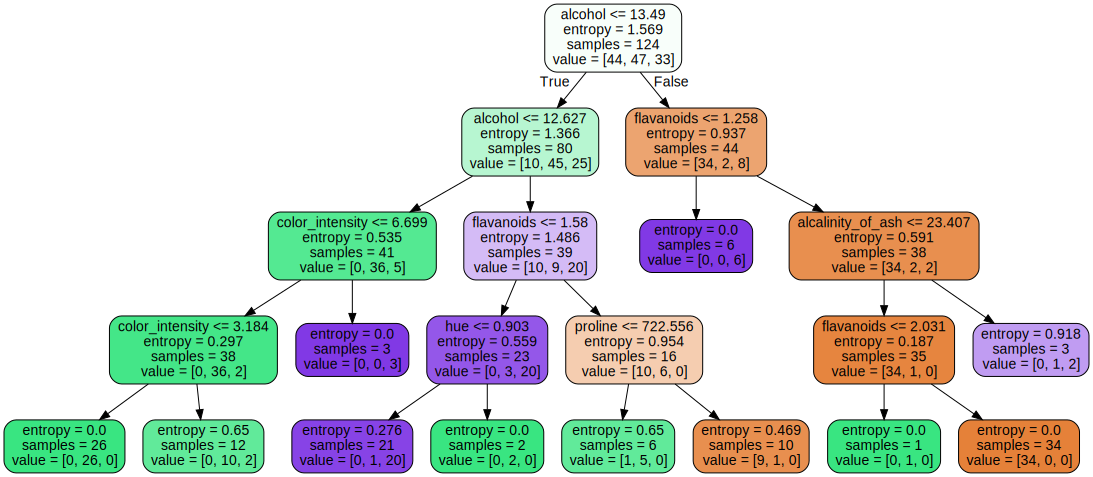

In [68]:
#調整max_depth, min_sample
clf = DecisionTreeClassifier(criterion='entropy', 
                             random_state=1, 
                             max_depth=4,
                             min_samples_split=5,
                             splitter='random'
                            )
clf = clf.fit(xtrain, ytrain)
print(clf.score(xtrain,ytrain), clf.score(xtest, ytest))

dot_data = export_graphviz(clf, feature_names= wine.feature_names, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

0.9629629629629629


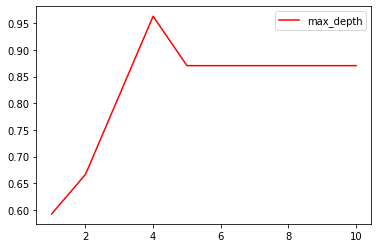

In [78]:
score_learn = []
for i in range(0,10):
    clf = DecisionTreeClassifier(criterion='entropy', 
                             random_state=1, 
                             max_depth=i+1,
                             min_samples_split=5,
                             splitter='random'
                            )
    clf = clf.fit(xtrain, ytrain)
    score_learn.append(clf.score(xtest, ytest))
print(max(score_learn))
plt.plot(range(1,11), score_learn, color = 'red', label = 'max_depth')
plt.legend()
plt.show()

0.9629629629629629


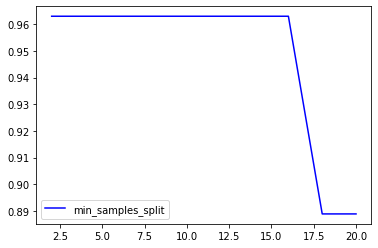

In [85]:
score_learn = []
for i in range(1, 20, 2):
    clf = DecisionTreeClassifier(criterion='entropy', 
                                 random_state=1,
                                 max_depth=4,
                                 splitter='random',
                                 min_samples_split=i+1
                                )
    clf = clf.fit(xtrain, ytrain)
    score_learn.append(clf.score(xtest, ytest))
print(max(score_learn))
plt.plot(range(2,21,2), score_learn, color = 'blue', label = 'min_samples_split')
plt.legend()
plt.show()